# read the files and plot them

In [1]:
import numpy as np
import pandas as pd
import mplfinance as mpf
import os
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import mplfinance as mpf

# read data with the same ticker with the same interval into 1 dataframe

In [2]:
tickerpair="BTCUSDT"
interval="30m"

In [3]:
intervals=['1m','3m','5m','15m','30m','1h','2h','3h','4h','6h','8h','12h','1d','3d','1w','1Month']
years=sorted(set([g.split("_")[2] for g in glob(f"kline_data\\{tickerpair}/*")]))

In [4]:
%%time
df = [pd.read_csv(g) for g in sorted(glob(f"kline_data\\{tickerpair}/*")) if f"_{interval}.csv" in g]
df = pd.concat(df, ignore_index=True).drop_duplicates().reset_index(drop=True)

CPU times: total: 266 ms
Wall time: 392 ms


In [9]:
## formating for mplfinance
dfmpl=df[["open_time","open","high","low","close","volume"]]
dfmpl = dfmpl.rename(columns={"open_time":"Date","open":"Open","high":"High","low":"Low","close":"Close","volume":"Volume"})
dfmpl=dfmpl.set_index("Date")
dfmpl.index = pd.to_datetime(dfmpl.index,unit="ms")
print(len(dfmpl))
dfmpl=dfmpl.iloc[-200:]

93105


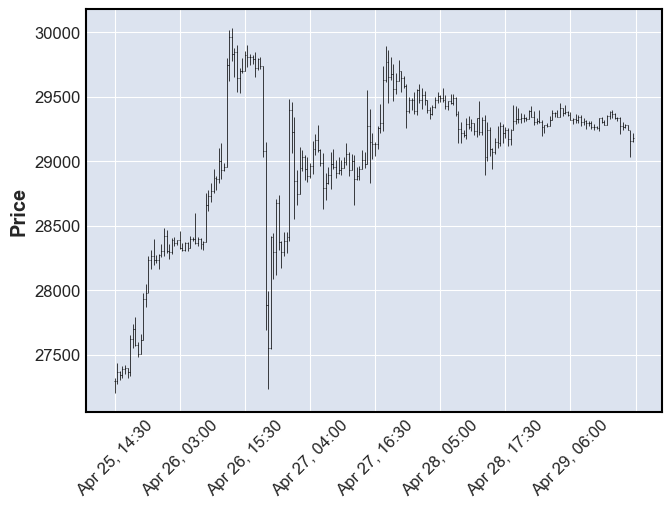

In [10]:
mpf.plot(dfmpl,type="ohlc")

In [11]:
!conda env list

# conda environments:
#
base                     C:\Users\aatan\anaconda3
agt                      C:\Users\aatan\anaconda3\envs\agt
crytrad               *  C:\Users\aatan\anaconda3\envs\crytrad
                         c:\Users\aatan\Documents\Github\CryptoTrader\.conda
crytrad                  c:\Users\aatan\anaconda3\envs\crytrad

